### Now the same but only for hot drinks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from datetime import datetime
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
bakery_temp = pd.read_pickle('Data/bakery_temp_dataframe.pkl')

In [3]:
bakery_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20506 entries, 0 to 20505
Data columns (total 18 columns):
Date           20506 non-null object
Time           20506 non-null object
Transaction    20506 non-null int64
Item           20506 non-null object
Date_Time      20506 non-null datetime64[ns]
Day_of_Week    20506 non-null object
Month          20506 non-null int64
Month_Order    20506 non-null int64
Season         20506 non-null object
Hour           20506 non-null int64
Session        20506 non-null object
Category       20506 non-null object
Hourly         20506 non-null datetime64[ns]
Monthly        20506 non-null object
Weekly         20506 non-null object
Unnamed: 0     20506 non-null float64
time           20506 non-null float64
temperature    20506 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(4), object(9)
memory usage: 3.0+ MB


In [4]:
bakery_temp.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
Date_Time      0
Day_of_Week    0
Month          0
Month_Order    0
Season         0
Hour           0
Session        0
Category       0
Hourly         0
Monthly        0
Weekly         0
Unnamed: 0     0
time           0
temperature    0
dtype: int64

In [5]:
bakery_temp = bakery_temp[bakery_temp['Item'].isin(['Coffee', 'Tea', 'Hot Chocolate'])]

In [6]:
df_columns = bakery_temp.columns
df_columns

Index(['Date', 'Time', 'Transaction', 'Item', 'Date_Time', 'Day_of_Week',
       'Month', 'Month_Order', 'Season', 'Hour', 'Session', 'Category',
       'Hourly', 'Monthly', 'Weekly', 'Unnamed: 0', 'time', 'temperature'],
      dtype='object')

In [7]:
#Extracts the dates
dates = pd.DatetimeIndex(bakery_temp['Date_Time'])

In [8]:
#Create new dataset with only item and date 
bakery = pd.DataFrame(bakery_temp.Item.values, columns=['Item'], index=dates)

In [9]:
bakery_test = pd.DataFrame(bakery_temp.values, columns=['Date', 'Time', 'Transaction', 'Item', 'Date_Time', 'Day_of_Week',
       'Month', 'Season', 'Hour', 'Session', 'Category', 'Hourly', 'Monthly',
       'Weekly', 'Month_Order', 'Other', 'time', 'temperature'])

In [10]:
bakery_test.head(3)

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Season,Hour,Session,Category,Hourly,Monthly,Weekly,Month_Order,Other,time,temperature
0,2016-10-30,10:13:03,5,Coffee,2016-10-30 10:13:03,Sunday,10,1,Autumn,10,Morning,drinks,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629,752386,12
1,2016-10-30,10:19:12,7,Coffee,2016-10-30 10:19:12,Sunday,10,1,Autumn,10,Morning,drinks,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629,752386,12
2,2016-10-30,10:19:12,7,Tea,2016-10-30 10:19:12,Sunday,10,1,Autumn,10,Morning,drinks,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629,752386,12


The date here is not the index so in order to aggretate it, need to do a few extra steps.

In [11]:
#if we do not have index as datetime
r = bakery_temp.resample('D', on='Date_Time')

In [12]:
testing_dataf =r.agg({'Item' : 'count', 'temperature' : 'mean'})

In [13]:
#fill zeros with last seen values
#testing_dataframe = testing_dataframe.ffill()

In [14]:
testing_dataf[testing_dataf['Item']==0]  & testing_dataf[testing_dataf['Item']==1]

,Item,temperature
Date_Time,,
2016-12-25,False,False
2016-12-26,False,False
2017-01-01,False,False
2017-01-02,False,False


In [15]:
testing_dataframe = testing_dataf[testing_dataf['Item']!=0]

In [16]:
testing_dataframe = testing_dataf[testing_dataf['Item'] !=1]

In [17]:
testing_dataframe.isnull().sum()

Item           0
temperature    4
dtype: int64

In [18]:
#fill nans with last seen values
testing_dataframe = testing_dataframe.ffill()

In [19]:
testing_dataframe.isnull().sum()

Item           0
temperature    0
dtype: int64

In [20]:
X = testing_dataframe[["temperature"]]
y = testing_dataframe["Item"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

129 33
129 33


In [21]:
model = LinearRegression()

#estimation the line
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print(model.intercept_, model.coef_)

45.40053191336465 [-0.36043735]


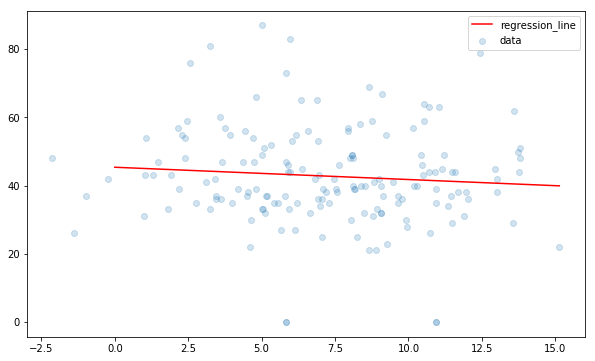

In [23]:
import numpy as np

x_values_to_plot = np.linspace(0, testing_dataframe["temperature"].max(), 100)
y_values_to_plot = (x_values_to_plot * model.coef_) + model.intercept_

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(testing_dataframe["temperature"], testing_dataframe["Item"], label="data", alpha=0.2)
ax.plot(x_values_to_plot, y_values_to_plot, label="regression_line", c="r")
ax.legend(loc="best")

plt.show()

C:\Users\yolan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


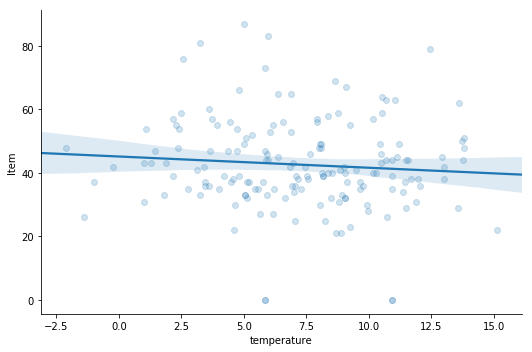

In [24]:
sns.lmplot(x='temperature', y='Item', data=testing_dataframe, aspect=1.5, scatter_kws={'alpha':0.2});

We can interpret this as that predicted value does not change whenever temperature changes.

C:\Users\yolan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


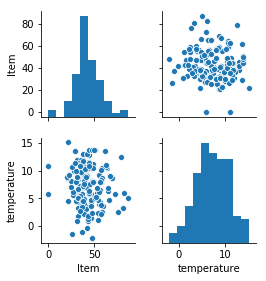

In [25]:
sns.pairplot(testing_dataframe, size=2);

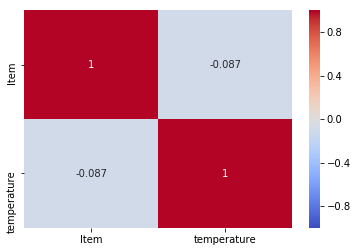

In [26]:
import seaborn as sns

sns.heatmap(testing_dataframe.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm",
            annot=True);

In [27]:
y_pred = model.predict(X_train)
y_pred

array([40.4363266 , 42.54232696, 44.54449321, 40.71484637, 42.13406843,
       42.28196528, 44.48046815, 44.87137921, 41.38766275, 43.69846665,
       42.47197845, 41.41855738, 46.16646128, 42.38186911, 45.75122771,
       42.49496552, 45.89959901, 42.45233923, 43.26925019, 42.6782814 ,
       43.88484665, 43.24659305, 44.10295745, 44.5086022 , 42.81107411,
       42.77448836, 42.07140148, 42.48760966, 41.82018757, 41.80903118,
       42.93754336, 42.86305297, 42.17844045, 44.15902549, 41.11016475,
       42.1385739 , 40.73887552, 43.5532905 , 41.60066697, 41.46344702,
       42.87747046, 41.92279857, 43.17237375, 40.71484637, 41.27011472,
       45.48635033, 43.2597525 , 41.73924725, 41.73308188, 41.53276189,
       42.32780351, 41.54221392, 41.4684881 , 41.26171683, 42.24212327,
       43.57650048, 41.0942541 , 43.58742282, 43.39238096, 41.54442439,
       42.12431779, 43.24609957, 41.46344702, 40.44812273, 42.21813385,
       41.26369415, 43.54963741, 43.11036844, 43.48050988, 43.29

In [28]:
#errors, rmse, larger because of the outliners
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 10.571586612806827
MSE: 200.94927578004797
RMSE: 14.175657860573807


In [29]:
y_pred_mean = [y_train.mean()] * len(y_train)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_mean)))

RMSE (model): 14.175657860573807
RMSE: (baseline model): 14.234031607029557


In [30]:
y_pred_mean = [y_test.mean()] * len(y_test)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))


RMSE (model): 14.159985333619591
RMSE: (baseline model): 14.1859615806888


Score, as expected

In [31]:
print(model.score(X_test, y_test))

0.0036588939091470873


In [32]:
results = pd.DataFrame({'Actual': y_train.values, 'Predicted':  model.predict(X_train)})  

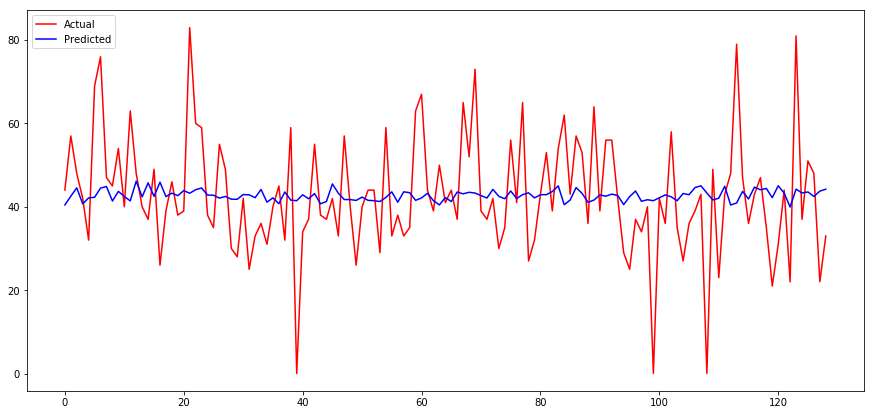

In [33]:
results[['Actual', 'Predicted']].plot(figsize=(15,7), style={'Actual': 'r', 'Predicted': 'b'})

In [34]:
resultsTest = pd.DataFrame({'Actual': y_test.values, 'Predicted':  model.predict(X_test)})  

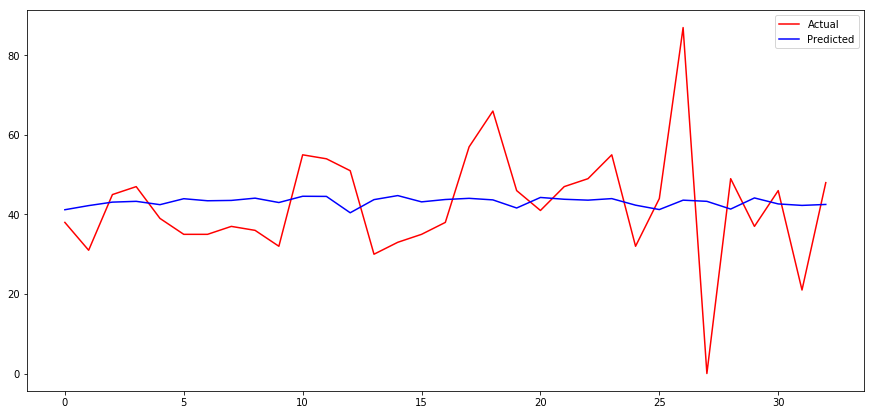

In [35]:
resultsTest[['Actual', 'Predicted']].plot(figsize=(15,7), style={'Actual': 'r', 'Predicted': 'b'})